# Google Playstore

## Load in Dataset

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

nRowsRead = None
df = pd.read_csv('data/Google-Playstore.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Google-Playstore-32K.csv'

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


## Cleaning

### Remove irrelevant columns

In [83]:
df = df.drop(['App Id', 'Currency', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Size', 'Price'], axis=1)

### Combine duplicate categories

In [18]:
# Collapse 'Music' and 'Music & Audio' into 'Music'
#df['Category'] = df['Category'].str.replace('Music & Audio', 'Music')

# Collapse 'Educational' and 'Education' into 'Education'
#df['Category'] = df['Category'].str.replace('Educational', 'Education')

### Remove paid apps

In [84]:
df = df[df['Free'] != False]

### Remove irrelevant categories

In [85]:
irrelevant_cat = ['Puzzle', 
                  'Arcade', 
                  'Simulation', 
                  'Action', 
                  'Adventure', 
                  'Racing', 
                  'Role Playing', 
                  'Board', 
                  'Strategy', 
                  'Casino', 
                  'Card', 
                  'Word', 
                  'Sports', 
                  'Trivia',
                  'Casual',
                  'Music',
                  'Educational']

for cat in irrelevant_cat:
    df = df.drop(df.index[df['Category'] == cat])

### Drop missing values

In [86]:
df.dropna(inplace=True)

### Convert Date

In [87]:
df['Released'] = pd.to_datetime(df['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')


## Plots

### Number of installations

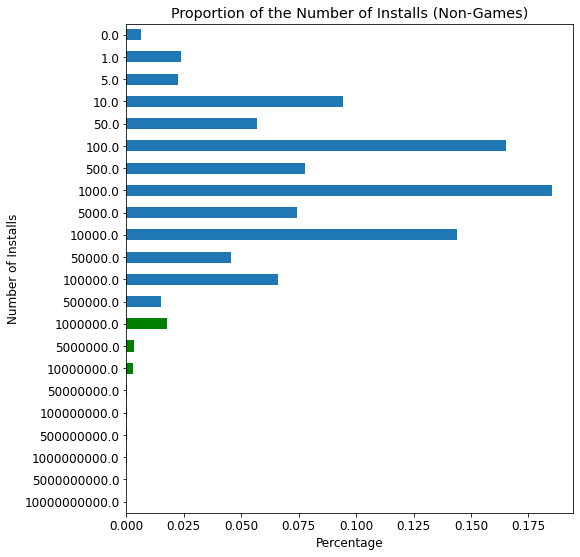

In [88]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 9)})
plt.ylabel('Number of Installs')
plt.xlabel('Percentage')
plus_mill = ['tab:blue' if (x >= 10000) else 'green' for x in df['Minimum Installs'].value_counts()]
df['Minimum Installs'].value_counts(normalize=True).sort_index().plot(kind="barh", title='Proportion of the Number of Installs (Non-Games)', color=plus_mill);
plt.gca().invert_yaxis()

### Correlation with ratings and installation

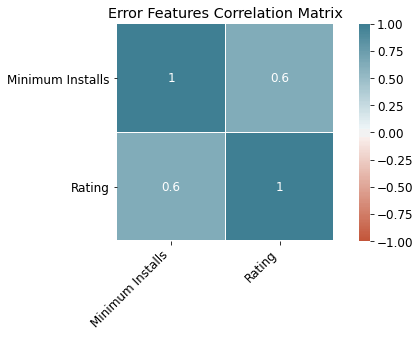

In [89]:
rating_installation = df[['Minimum Installs', 'Rating']]

corr = rating_installation.corr(method='spearman')

fig, ax = plt.subplots(figsize=(9, 4))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".1n",
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right',
);
plt.title("Error Features Correlation Matrix")
ax

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898709 entries, 0 to 1118135
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          898709 non-null  object        
 1   Category          898709 non-null  object        
 2   Rating            898709 non-null  float64       
 3   Rating Count      898709 non-null  float64       
 4   Installs          898709 non-null  object        
 5   Minimum Installs  898709 non-null  float64       
 6   Maximum Installs  898709 non-null  int64         
 7   Free              898709 non-null  bool          
 8   Minimum Android   898709 non-null  object        
 9   Developer Id      898709 non-null  object        
 10  Released          898709 non-null  datetime64[ns]
 11  Last Updated      898709 non-null  object        
 12  Content Rating    898709 non-null  object        
 13  Ad Supported      898709 non-null  bool          
 14  In 

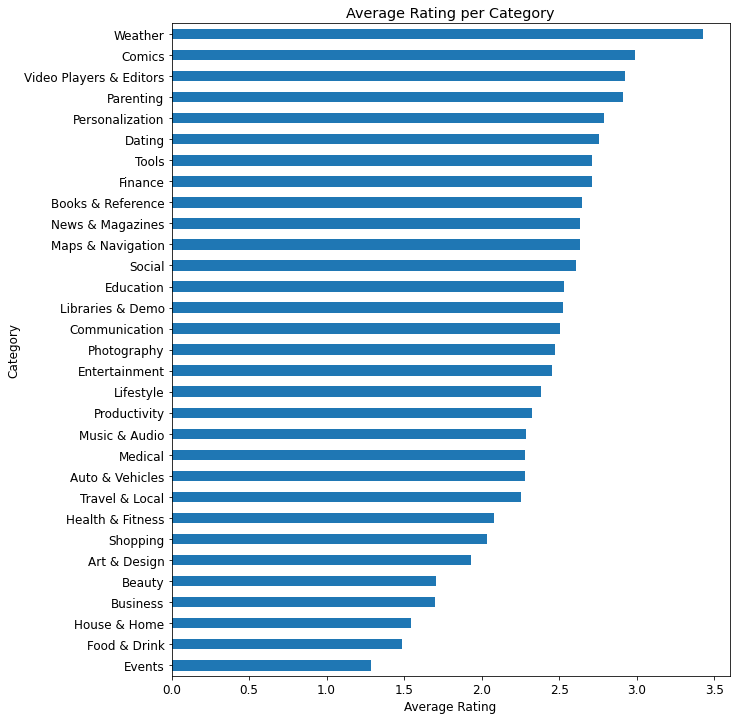

In [119]:
all_apps = df.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating')
all_apps.sort_values(ascending=False).plot(kind="barh", title='Average Rating per Category');
plt.gca().invert_yaxis()
print(df.info())

### Apps with over 1 million

In [120]:
million = df[df['Minimum Installs'] >= 1000000]

### App ratings (All apps)

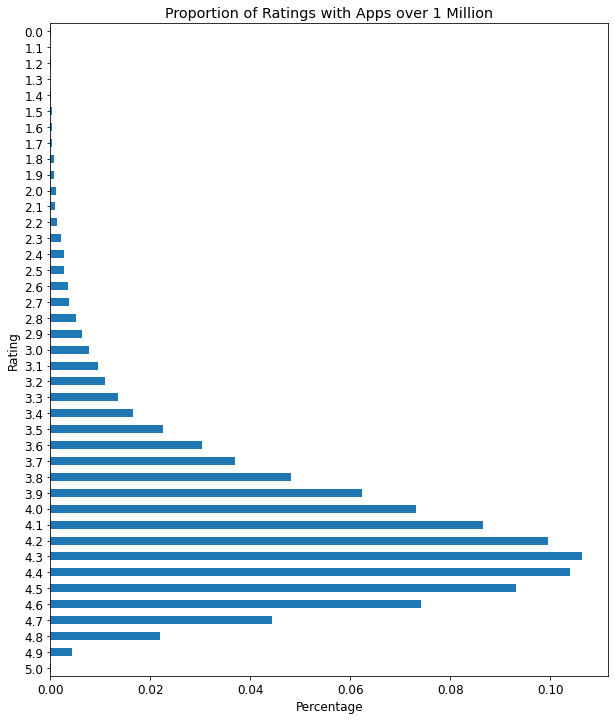

In [121]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Rating')
plt.xlabel('Percentage')
million['Rating'].value_counts(normalize=True).sort_index().plot(kind="barh", title='Proportion of Ratings with Apps over 1 Million');
plt.gca().invert_yaxis()

### Average rating per category (Over 1 million installs)

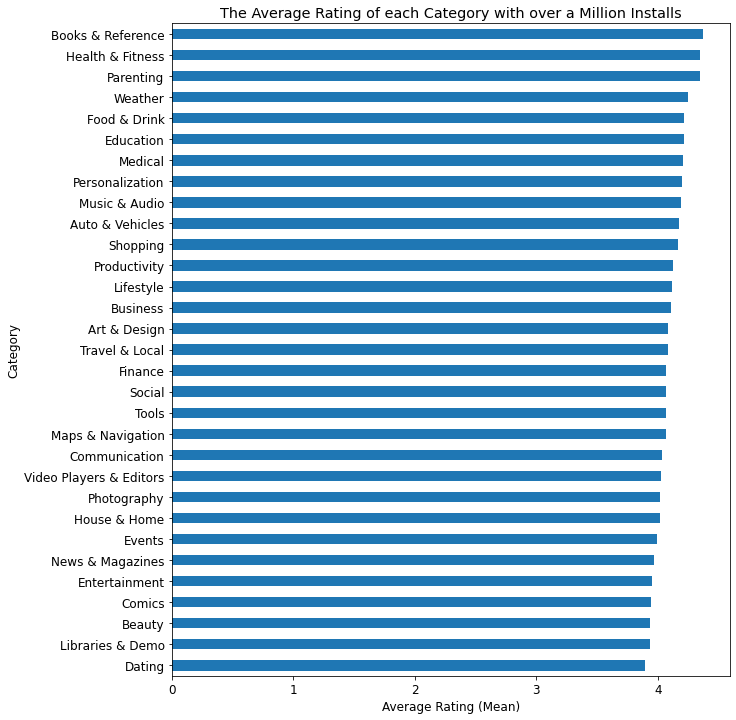

In [122]:
average = million.groupby('Category')['Rating'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Average Rating (Mean)')
average.sort_values(ascending=False).plot(kind="barh", title='The Average Rating of each Category with over a Million Installs');
plt.gca().invert_yaxis()

### Ratings over 4.0

In [123]:
pd.set_option("display.max.rows", 100)

In [125]:
v_good_rating = million[(million['Rating'] >= 4.8) & (million['Rating'] <= 5.0)]
good_rating = million[million['Rating'] >= 4.0]
bad_rating = million[(million['Rating'] <= 2.2) & (million['Rating'] >= 0.1)]

#v_good_rating.sort_values(by=['Rating'], ascending=False)
#bad_rating.sort_values(by=['Rating'])

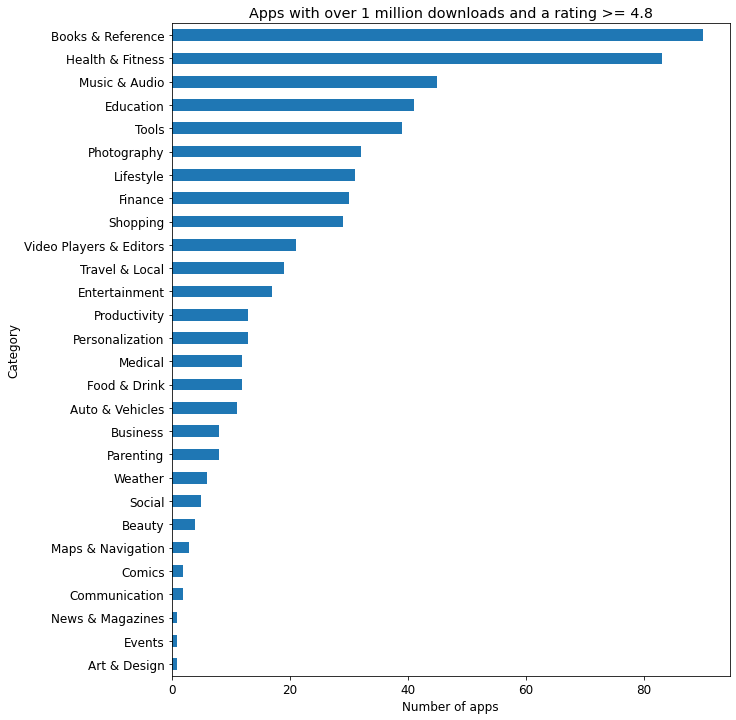

In [126]:
average = v_good_rating['Category'].value_counts()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of apps')
average.sort_values(ascending=False).plot(kind="barh", title='Apps with over 1 million downloads and a rating >= 4.8');
plt.gca().invert_yaxis()

### Proportion of Categories

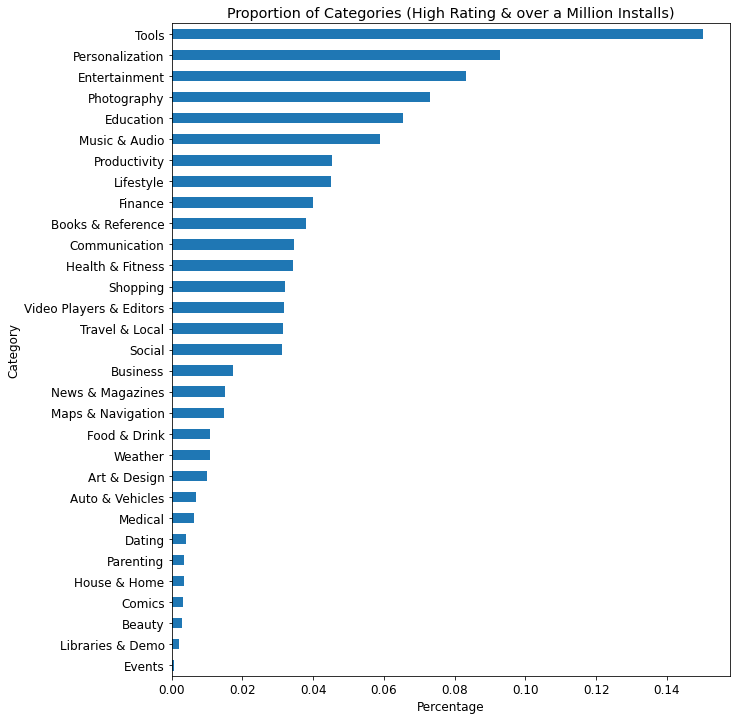

In [127]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Percentage')
good_rating['Category'].value_counts(normalize=True).plot(kind="barh", title='Proportion of Categories (High Rating & over a Million Installs)');
plt.gca().invert_yaxis()

### Average number of installs per category

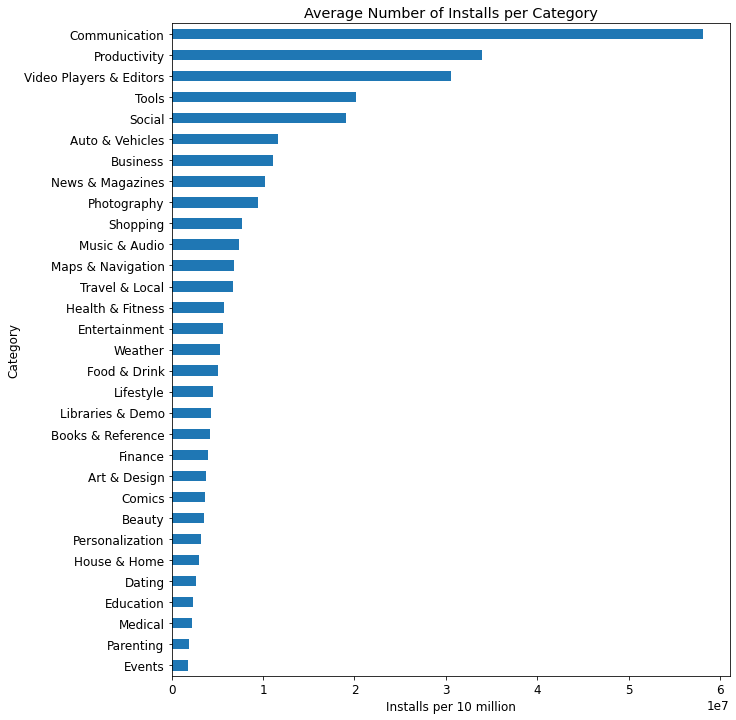

In [128]:
average_install = good_rating.groupby('Category')['Minimum Installs'].mean()
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
#average_install.sort_index().plot(kind="barh", title='Average Number of Installs per Category');
average_install.sort_values().plot(kind="barh", title='Average Number of Installs per Category');
#plt.gca().invert_yaxis()

### Average installs per age rating

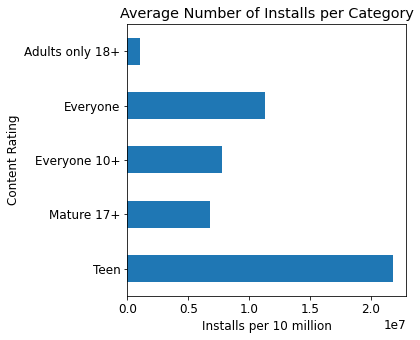

In [129]:
age_install = good_rating.groupby('Content Rating')['Minimum Installs'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
age_install.sort_index().plot(kind="barh", title='Average Number of Installs per Category');
plt.gca().invert_yaxis()

In [146]:
good_rating["Content Rating"].value_counts()

Everyone           12988
Teen                1568
Mature 17+           663
Everyone 10+         220
Adults only 18+        1
Name: Content Rating, dtype: int64

### Does editors choice matter?

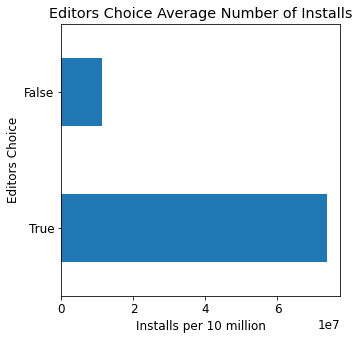

In [130]:
editor_install = good_rating.groupby('Editors Choice')['Minimum Installs'].mean()

plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
editor_install.sort_index().plot(kind="barh", title='Editors Choice Average Number of Installs');
plt.gca().invert_yaxis()

In [147]:
good_rating["Editors Choice"].value_counts()

False    15211
True       229
Name: Editors Choice, dtype: int64

In [131]:
ad_install = good_rating.groupby('Ad Supported')['Minimum Installs'].mean()
in_app_install = good_rating.groupby('In App Purchases')['Minimum Installs'].mean()

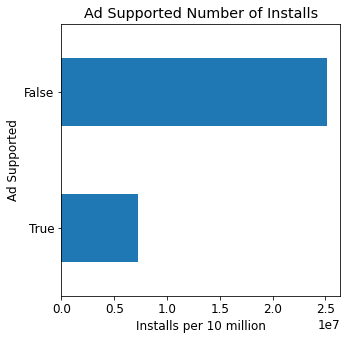

In [132]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
ad_install.sort_index().plot(kind="barh", title='Ad Supported Number of Installs');
plt.gca().invert_yaxis()

In [149]:
good_rating["Ad Supported"].value_counts()

True     11202
False     4238
Name: Ad Supported, dtype: int64

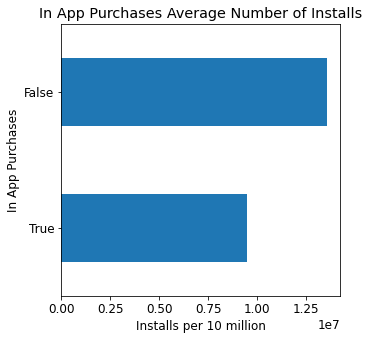

In [133]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})
plt.ylabel('Category')
plt.xlabel('Installs per 10 million')
in_app_install.sort_index().plot(kind="barh", title='In App Purchases Average Number of Installs');
plt.gca().invert_yaxis()

In [150]:
good_rating["In App Purchases"].value_counts()

False    10069
True      5371
Name: In App Purchases, dtype: int64

### Editors Choice apps

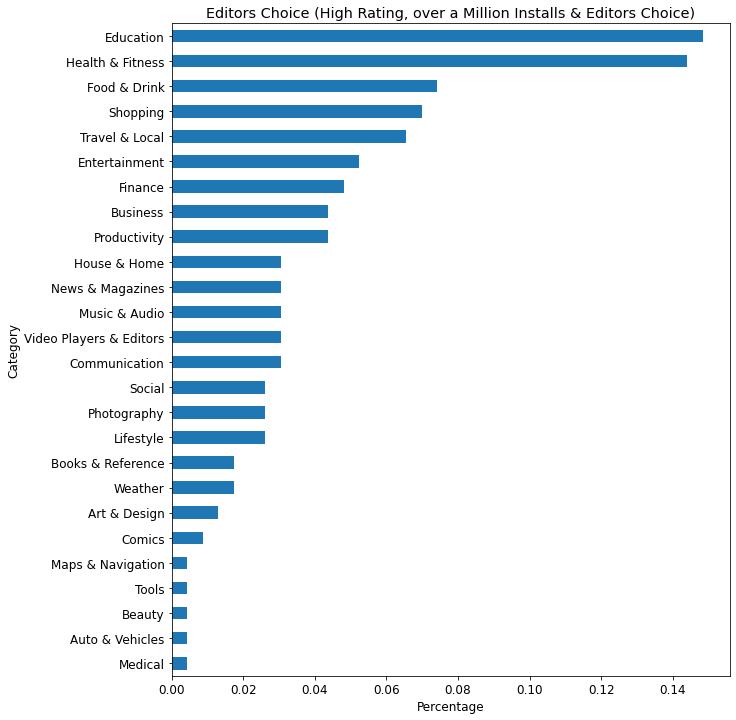

In [138]:
app_editors = good_rating[good_rating['Editors Choice'] != False]
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Percentage')
app_editors['Category'].value_counts(normalize=True).plot(kind="barh", title='Editors Choice (High Rating, over a Million Installs & Editors Choice)');
plt.gca().invert_yaxis()

### Latest Apps

In [135]:
#good_rating.sort_values(by=['Released'], ascending=False)

recent_apps = good_rating[(good_rating['Released'] > '2020-10-01') & (good_rating['Released'] < '2020-12-31')]
recent_apps.info()
recent_apps.sort_values(by=['Released'], ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 55955 to 1091744
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App Name          13 non-null     object        
 1   Category          13 non-null     object        
 2   Rating            13 non-null     float64       
 3   Rating Count      13 non-null     float64       
 4   Installs          13 non-null     object        
 5   Minimum Installs  13 non-null     float64       
 6   Maximum Installs  13 non-null     int64         
 7   Free              13 non-null     bool          
 8   Minimum Android   13 non-null     object        
 9   Developer Id      13 non-null     object        
 10  Released          13 non-null     datetime64[ns]
 11  Last Updated      13 non-null     object        
 12  Content Rating    13 non-null     object        
 13  Ad Supported      13 non-null     bool          
 14  In App Purchases  1

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
215836,Next: Shop Fashion & Homeware,Shopping,4.1,16991.0,"1,000,000+",1000000.0,2223665,True,5.0 and up,Next Plc,2020-11-24,"Nov 24, 2020",Mature 17+,False,False,False
1091744,Ujjivan Mobile Banking,Finance,4.5,19605.0,"1,000,000+",1000000.0,1057919,True,4.4 and up,Ujjivan Small Finance Bank Limited,2020-11-23,"Oct 15, 2020",Everyone,False,False,False
174084,Coco-melon Nursery Rhymes and Kid Songs,Education,4.1,2146.0,"1,000,000+",1000000.0,1218452,True,4.3 and up,TDT2020,2020-11-10,"Nov 18, 2020",Everyone,True,False,False
222507,Moj - Made in India | Short Video App,Social,4.3,292919.0,"50,000,000+",50000000.0,80048931,True,4.1 and up,ShareChat,2020-11-08,"Nov 25, 2020",Teen,False,False,False
567379,Black Friday Promobit: Ofertas Promoções Desco...,Shopping,4.7,31697.0,"1,000,000+",1000000.0,1023321,True,5.0 and up,"Ofertas, Promoções e Descontos das Melhores Lo...",2020-11-05,"Nov 16, 2020",Everyone,False,False,False
132617,Mi Calendar,Productivity,4.3,4853.0,"50,000,000+",50000000.0,72374699,True,5.0 and up,Xiaomi Inc.,2020-11-03,"Jul 15, 2020",Everyone,False,False,False
136280,IKEA,Shopping,4.4,50642.0,"5,000,000+",5000000.0,5781427,True,7.0 and up,Inter IKEA Systems B.V.,2020-10-24,"Nov 23, 2020",Everyone,False,False,False
734892,Мой Дом.ru,Communication,4.3,9139.0,"1,000,000+",1000000.0,1586011,True,4.4 and up,ЭР-Телеком Холдинг,2020-10-21,"Nov 19, 2020",Everyone,False,False,False
673082,Maps Among us for Minecraft,Entertainment,4.2,46559.0,"1,000,000+",1000000.0,2508202,True,4.1 and up,Super Effects,2020-10-14,"Oct 19, 2020",Everyone,True,True,False
827222,Préstamos efectivo Crédito seguro y rápido,Finance,4.4,36277.0,"1,000,000+",1000000.0,1170084,True,4.4 and up,Paay Préstamos Personales,2020-10-14,"Nov 06, 2020",Everyone,False,False,False


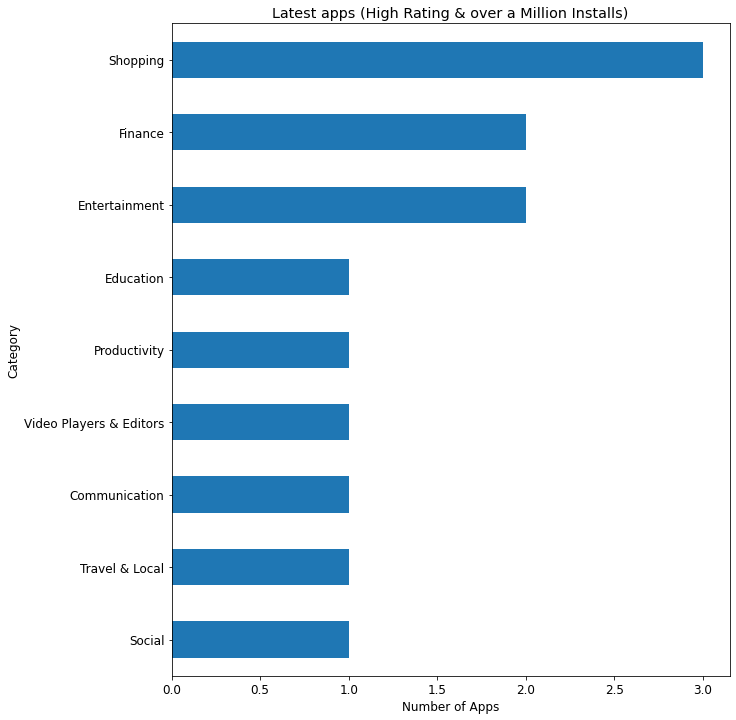

In [136]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of Apps')
recent_apps['Category'].value_counts().plot(kind="barh", title='Latest apps (High Rating & over a Million Installs)');
plt.gca().invert_yaxis()

In [143]:
recent_apps2 = million[(million['Released'] > '2020-10-01') & (million['Released'] < '2020-12-31')]
recent_apps2.sort_values(by=['Released'], ascending=False)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1106080,Sorun Kalmasın - YKS TYT AYT KPSS DGS,Education,3.6,9889.0,"1,000,000+",1000000.0,1019379,True,4.4 and up,Sorun Kalmasın,2020-12-01,"Dec 01, 2020",Everyone,True,False,False
215836,Next: Shop Fashion & Homeware,Shopping,4.1,16991.0,"1,000,000+",1000000.0,2223665,True,5.0 and up,Next Plc,2020-11-24,"Nov 24, 2020",Mature 17+,False,False,False
1091744,Ujjivan Mobile Banking,Finance,4.5,19605.0,"1,000,000+",1000000.0,1057919,True,4.4 and up,Ujjivan Small Finance Bank Limited,2020-11-23,"Oct 15, 2020",Everyone,False,False,False
142910,Mi Claro,Shopping,2.2,9437.0,"10,000,000+",10000000.0,11854698,True,5.0 and up,Claro Centroamérica,2020-11-18,"Nov 19, 2020",Everyone,False,False,False
740812,Mi Claro,Tools,2.2,6533.0,"1,000,000+",1000000.0,1235088,True,5.0 and up,Claro Chile,2020-11-18,"Nov 25, 2020",Everyone,False,False,False
174084,Coco-melon Nursery Rhymes and Kid Songs,Education,4.1,2146.0,"1,000,000+",1000000.0,1218452,True,4.3 and up,TDT2020,2020-11-10,"Nov 18, 2020",Everyone,True,False,False
222507,Moj - Made in India | Short Video App,Social,4.3,292919.0,"50,000,000+",50000000.0,80048931,True,4.1 and up,ShareChat,2020-11-08,"Nov 25, 2020",Teen,False,False,False
567379,Black Friday Promobit: Ofertas Promoções Desco...,Shopping,4.7,31697.0,"1,000,000+",1000000.0,1023321,True,5.0 and up,"Ofertas, Promoções e Descontos das Melhores Lo...",2020-11-05,"Nov 16, 2020",Everyone,False,False,False
132617,Mi Calendar,Productivity,4.3,4853.0,"50,000,000+",50000000.0,72374699,True,5.0 and up,Xiaomi Inc.,2020-11-03,"Jul 15, 2020",Everyone,False,False,False
103843,LEGO® 3D Catalogue,Entertainment,3.5,26698.0,"1,000,000+",1000000.0,3373120,True,4.4 and up,LEGO System A/S,2020-10-27,"Oct 28, 2020",Everyone,False,False,False


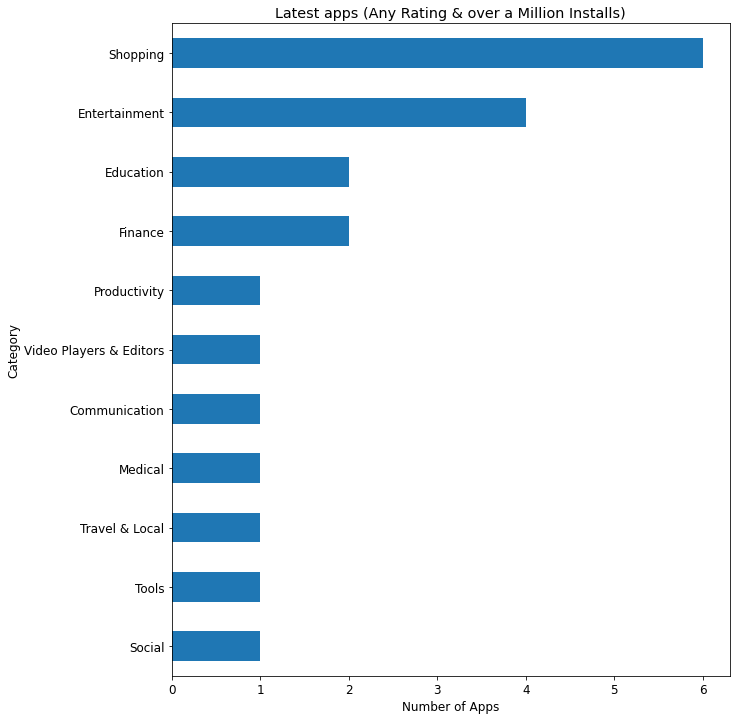

In [145]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 12)})
plt.ylabel('Category')
plt.xlabel('Number of Apps')
recent_apps2['Category'].value_counts().plot(kind="barh", title='Latest apps (Any Rating & over a Million Installs)');
plt.gca().invert_yaxis()